##### Author: Jimin Kim (jk55@uw.edu)
##### Version 1.5.0

# LAB3: 
# WORKING WITH IMAGE DATA

## Part 1: Image Formats

### 1.1 - Loading images in Python with matplotlib

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [2]:
img = mpimg.imread('TSR.jpg')

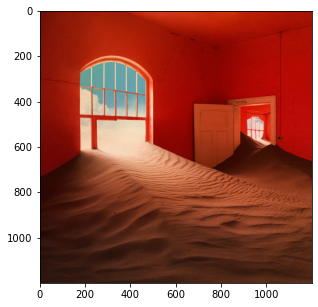

In [3]:
fig = plt.figure(figsize=(5, 5))

plt.imshow(img)

In [4]:
type(img)

numpy.ndarray

### 1.2 - Reading images as numpy arrays

In [ ]:
print(img.shape)                                                # The color image is Height x Width x RGB layers

In [ ]:
img_red = img[:, :, 0]                                          # Take the Red layer from the image 
img_green = img[:, :, 1]                                        # Green layer from the image 
img_blue = img[:, :, 2]                                         # Blue layer from the image 

In [ ]:
print(img_red, img_red.shape)

### 1.3 - Writing images with matplotlib

In [ ]:
img_redonly = np.zeros((1200, 1200, 3), dtype = 'int')          # Create empty 3D array with integer type

img_redonly[:, :, 0] = img[:, :, 0]                             # populate the first channel with red channel

In [ ]:
fig = plt.figure(figsize=(5, 5))

plt.imshow(img_redonly)

plt.savefig('imgplot_redonly.png')                              # plt.savefig() saves the image

### 1.4 - Converting color image to grayscale

In [ ]:
from skimage import color
from skimage import io

img_gray = color.rgb2gray(io.imread('TSR.jpg'))  # Uses normalized 8-bit color code

In [ ]:
from PIL import Image                            # We will be using PIL in this template for RGB - grayscale conversion
img_gray = Image.open('TSR.jpg').convert('L')    # Uses standard 8-bit color code (integer)
img_gray = np.array(img_gray)                    # Convert to numpy array

## Part 2: Operations on image (Grayscale)

### 2.1 - Converting 2D array into 1D array with np.ndarray.flatten()

In [ ]:
flattened_2D_arr = np.ndarray.flatten(img_gray) # Convert 2D array into 1D array

print(flattened_2D_arr.shape)

### 2.2 - Analyzing an image with pixel histogram

In [ ]:
fig = plt.figure(figsize=(10, 5))

plt.hist(flattened_2D_arr, bins = 100, color = 'black') # Draws histogram with configured bin size

### 2.3 - Manipulating image pixels with histogram: Boolean mask method

In [ ]:
img_gray_copy1 = img_gray.copy()            # Copy the image to a new variable to avoid operating on a same image
img_gray_copy2 = img_gray.copy()

img_gray_copy1[img_gray_copy1 < 50] = 0     # Apply boolean mask and assign new values the indicies that are True
img_gray_copy2[img_gray_copy2 > 150] = 0

In [ ]:
fig = plt.figure(figsize=(5, 5))

plt.imshow(img_gray_copy1, cmap = 'gray', vmin = 0, vmax = 255) # Set vmin = 0, vmax = 255 to to correctly normalize the image

In [ ]:
fig = plt.figure(figsize=(5, 5))

plt.imshow(img_gray_copy2, cmap = 'gray', vmin = 0, vmax = 255)

### 2.4 - Image flipping with numpy flip functions

In [ ]:
img_gray_lr_flipped = np.fliplr(img_gray)    # left, right flip
img_gray_ud_flipped = np.flipud(img_gray)    # up, down flip

In [ ]:
fig = plt.figure(figsize=(5, 5))

plt.imshow(img_gray_lr_flipped, cmap = 'gray')

In [ ]:
fig = plt.figure(figsize=(5, 5))

plt.imshow(img_gray_ud_flipped, cmap = 'gray')

### 2.5 - Image downsampling (pick-one method)

In [ ]:
img_gray_downsampled_2 = img_gray[::2, ::2]       # Downsample rate = x2
img_gray_downsampled_4 = img_gray[::4, ::4]       # Downsample rate = x4

In [ ]:
fig = plt.figure(figsize=(5, 5))

plt.imshow(img_gray_downsampled_2, cmap = 'gray')

In [ ]:
fig = plt.figure(figsize=(5, 5))

plt.imshow(img_gray_downsampled_4, cmap = 'gray')

### 2.6 - Image blending

In [ ]:
img_gray2 = Image.open('currents.jpg').convert('L') # Load a second sample grayscale image
img_gray2 = np.array(img_gray2)                     # Convert to numpy array    

In [ ]:
image_gray1_normalized = img_gray * 0.5             # assign equal weights to each image pixels
image_gray2_normalized = img_gray2 * 0.5
    
blended_image = image_gray1_normalized + image_gray2_normalized

In [ ]:
fig = plt.figure(figsize=(5, 5))

plt.imshow(blended_image, cmap = 'gray')

## Part 3: Operations on image (Color)

### 3.1 - Working with 3D arrays: Indexing

In [ ]:
# Sample 3D array
sample_3d_array = np.stack([np.reshape(np.arange(25), (5,5)), np.reshape(np.arange(25) * 2, (5,5)), 
                             np.reshape(np.arange(25) * 3, (5,5))], axis = 2)     

print(sample_3d_array[:, :, 0]) # First layer of axis 2
print(sample_3d_array[:, :, 1]) # Second layer of axis 2
print(sample_3d_array[:, :, 2]) # Third layer of axis 2

In [ ]:
print(sample_3d_array[:3,:3, 1], sample_3d_array[:3,:3, 1].shape)

In [ ]:
print(sample_3d_array[:3,:3,:2], sample_3d_array[:3,:3,:2].shape)

In [ ]:
print(sample_3d_array[:3,:3,:], sample_3d_array[:3,:3,:].shape)

In [ ]:
print(sample_3d_array[2,2,:], sample_3d_array[2,2,:].shape)

### 3.2 - Constructing 3D array from 2D arrays

In [ ]:
arr1 = np.zeros((5,5))     # 5 x 5 zeros
arr2 = np.ones((5,5))      # 5 x 5 ones
arr3 = np.ones((5,5)) * 2  # 5 x 5 twos

arr_3d = np.stack([arr1, arr2, arr3], axis =2 )
print(arr_3d.shape)

In [ ]:
print(arr_3d)

### 3.3 - Expanding image operations on color: Image flipping

In [ ]:
# Extract each color channel

img_red = img[:, :, 0]        
img_green = img[:, :, 1]
img_blue = img[:, :, 2]

In [ ]:
# Apply flip to each color channel

img_red_flipped_lr = np.fliplr(img_red)          
img_green_flipped_lr = np.fliplr(img_green)
img_blue_flipped_lr = np.fliplr(img_blue)

In [ ]:
# Flipping all channels
# Use np.stack with axis = 2 parameter to combine the color channels to a RGB image
img_flipped_lr = np.stack([img_red_flipped_lr, img_green_flipped_lr, img_blue_flipped_lr], axis = 2)

# Flipping only subset of channels
img_flipped_lr_partial = np.stack([img_red, img_green_flipped_lr, img_blue], axis = 2)

In [ ]:
fig = plt.figure(figsize=(5, 5))

plt.imshow(img_flipped_lr)

In [ ]:
fig = plt.figure(figsize=(5, 5))

plt.imshow(img_flipped_lr_partial)

### 3.4 - Expanding image operations on color: Image Downsampling

In [ ]:
# Apply downsampling to all color channels
img_red_downsampled = img_red[::10, ::10]
img_green_downsampled = img_green[::10, ::10]
img_blue_downsampled = img_blue[::10, ::10]

In [ ]:
img_downsampled = np.stack([img_red_downsampled, img_green_downsampled, img_blue_downsampled], axis = 2)

In [ ]:
fig = plt.figure(figsize=(5, 5))

plt.imshow(img_downsampled)

### 3.5 - Expanding image operations on color: Image Blending

In [ ]:
img1 = mpimg.imread('TSR.jpg')
img1 = img1.copy()

img2 = mpimg.imread('currents.jpg')
img2 = img2.copy()

In [ ]:
# Extract color channels from both images
img1_red, img2_red = img1[:, :, 0], img2[:, :, 0]
img1_green, img2_green = img1[:, :, 1], img2[:, :, 1]
img1_blue, img2_blue = img1[:, :, 2], img2[:, :, 2]

In [ ]:
# Blend each channel
blended_img_red = 0.5 * img1_red + 0.5 * img2_red
blended_img_green = 0.5 * img1_green + 0.5 * img2_green
blended_img_blue = 0.5 * img1_blue + 0.5 * img2_blue

In [ ]:
# Combine blended channel into a single 3D array
blended_img = np.stack([blended_img_red, blended_img_green, blended_img_blue], axis = 2)
blended_img = blended_img.astype('int')     # This command ensures all the pixels are in integer form 
                                            # as required by standard 8-bit color code

In [ ]:
fig = plt.figure(figsize=(5, 5))

plt.imshow(blended_img)